## Exam project

First we import all used packages throughout the project

In [36]:
# packagaes 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize
import scipy as sp
from scipy import linalg
from scipy import optimize
from scipy import interpolate
import sympy as sm
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from matplotlib import cm

<h1> Problem 1 - Linear Regression</h1>

Consider the following **linear equation:**

$$y_i = \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + \epsilon_i$$

Assume you have access to data of the **independent variables** ($x_{1,i}$, $x_{2,i}$) and the **dependent variable** ($y_i$) for $N$ individuals, where $i$ indexes individuals. The variable $\epsilon_i$ is a mean-zero **stochastic shock**.

And import given code block from the exam description: 

In [37]:
def DGP(N):
    
    # a. independent variables
    x1 = np.random.normal(0,1,size=N)
    x2 = np.random.normal(0,1,size=N)
    
    # b. errors
    eps = np.random.normal(0,1,size=N)
    
    extreme = np.random.uniform(0,1,size=N)
    eps[extreme < 0.05] += np.random.normal(-5,1,size=N)[extreme < 0.05]
    eps[extreme > 0.95] += np.random.normal(5,1,size=N)[extreme > 0.95]
    
    # c. dependent variable
    y = 0.1 + 0.3*x1 + 0.5*x2 + eps
    
    return x1, x2, y

In [38]:
np.random.seed(2020)
x1,x2,y = DGP(10000)

<h2> Question 1 </h2> 

Estimate the vector of coefficients $\mathbf{\beta} = (\beta_0,\beta_1,\beta_2)$ using **ordinary least squares (OLS)** implemented with **matrix algebra** by

$$ \hat{\mathbf{\beta}} = (\mathbf{X}^{\prime}\mathbf{X})^{-1}\mathbf{X}^{\prime}\mathbf{y} $$

where $\mathbf{X}^{\prime}$ is the transpose of $\mathbf{X}$ and

$$\mathbf{y} = 
\pmatrix{ y_1 \cr y_2 \cr  \vdots \cr y_N 
}
, \quad \mathbf{X} = \pmatrix{
1 & x_{1,1} & x_{2,1} \cr 
1 & x_{1,2} & x_{2,2} \cr 
\vdots & \vdots \cr 
1 & x_{1,N} & x_{2,N} 
}
$$

To estimate the vector of the coefficients $\beta$ = ($\beta_0$,$\beta_1$,$\beta_2$) we firstly calculate X transpose (X'), then the inverse product of X' and X, which is multiplied with X' and Y.
First, we define the X matrix as a dataframe. 


In [39]:
x0 = 1
X = pd.DataFrame({'x0':x0,'x1':x1,'x2':x2}) # X matrix

Beta can now be found: 

In [40]:
X_trans = X.T # transposing X 
X_trans_X = X_trans.dot(X) # multiplying the transposed X with X
Inv_X_X_trans = np.linalg.inv(X_trans_X) # inverting the product of transposed X multiplied with X
X_trans_y = X_trans.dot(y) # multiplying X transposed with y. Y is given above. 

beta_hat = Inv_X_X_trans.dot(X_trans_y) # find beta 

betas = pd.DataFrame({'Beta 0':beta_hat[:1],'Beta 1':beta_hat[1:2],'Beta 2':beta_hat[2:]}) # included for presentation purposes of betas
betas

Beta 0    Beta 1    Beta 2
0  0.095682  0.292943  0.503328

<h2> Question 2 </h2>

To construct a 3D plot we firstly calculate the values of $y_i$, as a function of the $x$ values and its corresponding beta values calculated in quesiton 1:

$$
\hat y_i = \hat \beta_0 + \hat \beta_1 x_1,_i + \hat \beta_2 x_2,_i
$$

We then combine then combine all values for $x_1$, $x_2$ & $y$ in a data frame. Finally we plot the 3D Graph

In [41]:
y_hat = np.dot(X,beta_hat) # calculating possible y's
df_y_hat = pd.DataFrame({'x1':x1,'x2':x2,'y_hat':y_hat})

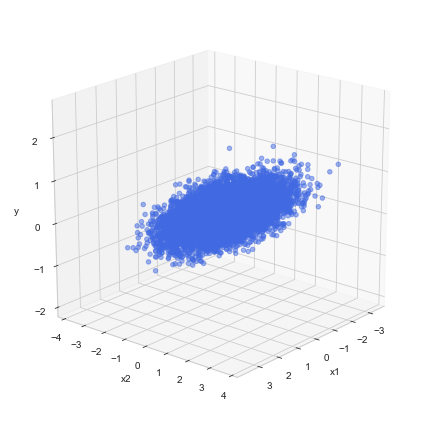

In [42]:
# Plotting values of y with x1 and x2 in a three dimensional scatter plot
fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.gca(projection='3d')
ax.scatter(df_y_hat['x1'],df_y_hat['x2'],df_y_hat['y_hat'], c='royalblue',alpha=.5)
ax.set(xlabel='x1',ylabel='x2',zlabel='y')
for angle in range(0,360):
    ax.view_init(20,40)
    plt.show()


<h2> Question 3 </h2>

To estimate the vector of the coefficients $\beta$ = ($\beta_0$,$\beta_1$,$\beta_2$) using a numerical solver, we create empty values for $\beta_0$,$\beta_1$ & $\beta_2$, then define the three values of $\beta$ and make it return the formula:

$$
\underset{\beta}{\textit{min}} \hspace2mm \sum^N_{i=1} (y_i - (\beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i}))^2
$$

We make initial guess for the $\beta$ values and minimize the formula to get the $\beta$ values.


In [43]:
# empty betas
b0 = np.empty(1)
b1 = np.empty(1)
b2 = np.empty(1)

def function(x, b0, b1, b2): # defining function for minimization

    b0 = x[0]
    b1 = x[1]
    b2 = x[2]

    return np.sum((y - (b0 + b1*x1 + b2*x2))**2)


#initial guess
b = np.array([0.2, 1.5, 9.5])

estimate = minimize(function, b, args=(b0,b1,b2), method='SLSQP')

b0 = estimate.x[0]
b1 = estimate.x[1]
b2 = estimate.x[2]

print("Solving with OLS implies following beta coefficients: "+"{:.5f}".format(b0)+" for beta 0, "+"{:.5f}".format(b1)+" for beta 1 and "+"{:.5f}".format(b2)+" for beta 2")

Solving with OLS implies following beta coefficients: 0.09568 for beta 0, 0.29294 for beta 1 and 0.50333 for beta 2


<h2> Question 4 </h2>

To estimate the vector of the coefficients $\beta$ = ($\beta_0$,$\beta_1$,$\beta_2$) using least absolute deviations (LAD), we create empty values for $\beta_0$,$\beta_1$ & $\beta_2$, then define the three values of $\beta$ and make it return the formula:


$$
\underset{\beta}{\textit{min}} \hspace2mm \sum^N_{i=1}| y_i - (\beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i})|
$$

We make initial guess for the $\beta$ values and minimize the formula to get the $\beta$ values.


In [44]:
# empty betas
b0 = np.empty(1)
b1 = np.empty(1)
b2 = np.empty(1)

def function(x, b0, b1, b2):# defining function for minimization

    b0 = x[0]
    b1 = x[1]
    b2 = x[2]

    return np.sum(np.absolute(y - (b0 + b1*x1 + b2*x2)))


#initial guess
h = np.array([0.4, 1.2, 10.5])

estimate = minimize(function, h, args=(b0,b1,b2), method='SLSQP')

b0 = estimate.x[0]
b1 = estimate.x[1]
b2 = estimate.x[2]

print("Solving with LAD implies following beta coefficients: "+"{:.5f}".format(b0)+" for beta 0, "+"{:.5f}".format(b1)+" for beta 1 and "+"{:.5f}".format(b2)+" for beta 2")

Solving with LAD implies following beta coefficients: 0.09227 for beta 0, 0.30747 for beta 1 and 0.51155 for beta 2


<h2> Question 5 </h2>

To compare the two methods and setting $N =  50$ and simulate 5.000 times 

In [45]:
# OLS
b0_OLS = np.empty(5000)
b1_OLS = np.empty(5000)
b2_OLS = np.empty(5000)

for k in range(5000):
    new_x1, new_x2, new_y = DGP(50) 
   
    def new_function(x, b0_OLS, b1_OLS, b2_OLS): 
        b0_OLS = x[0]
        b1_OLS = x[1]
        b2_OLS = x[2]

        return np.sum((new_y- (b0_OLS +  b1_OLS*new_x1 + b2_OLS*new_x2))**2)
    
    new_est = minimize(new_function, b, args=(b0_OLS,b1_OLS,b2_OLS),method = 'SLSQP')
    b0_OLS[k-1]=new_est.x[0]
    b1_OLS[k-1]=new_est.x[1]
    b2_OLS[k-1]=new_est.x[2]




# LAD
b0_LAD = np.empty(5000)
b1_LAD = np.empty(5000)
b2_LAD = np.empty(5000)

for k in range(5000):
    new_x1, new_x2, new_y = DGP(50) 
   
    def new_function(x, b0_LAD, b1_LAD, b2_LAD): 
        b0_LAD = x[0]
        b1_LAD = x[1]
        b2_LAD = x[2]

        return np.sum(np.absolute(new_y - (b0_LAD +  b1_LAD*new_x1 + b2_LAD*new_x2)))
    
    new_est = minimize(new_function, b, args=(b0_LAD,b1_LAD,b2_LAD),method = 'SLSQP')
    b0_LAD[k-1]=new_est.x[0]
    b1_LAD[k-1]=new_est.x[1]
    b2_LAD[k-1]=new_est.x[2]

To compare our results, we make a plot of the two different methods:

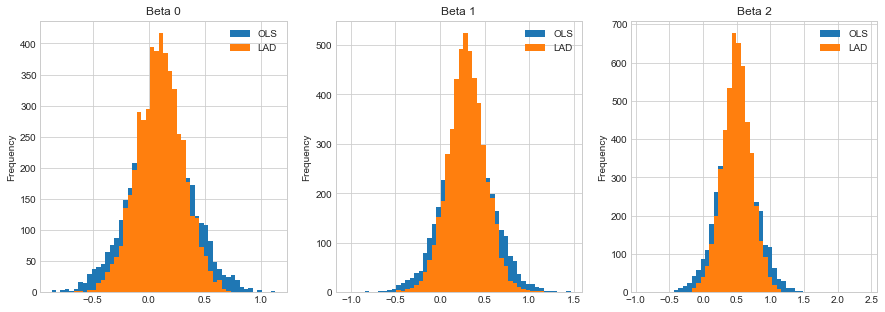

In [46]:

df_b0_hist = pd.DataFrame({'OLS':b0_OLS,'LAD':b0_LAD})
df_b1_hist = pd.DataFrame({'OLS':b1_OLS,'LAD':b1_LAD})
df_b2_hist = pd.DataFrame({'OLS':b2_OLS,'LAD':b2_LAD})
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
df_b0_hist.plot(ax=axes[0],kind="hist", title="Beta 0",bins=50)
df_b1_hist.plot(ax=axes[1],kind="hist", title="Beta 1",bins=50)
df_b2_hist.plot(ax=axes[2],kind="hist", title="Beta 2",bins=50)
plt.show()



From the above three distributions of $\beta_0$,$\beta_1$ of $\beta_2$ we see that both the OLS & LAD is normal distrubited. We see that the LAD method implies less variance. Therfore the LAD method is our preferable choise of method, thus their estimated minimum values barrily differ. 

<h1> Problem 2 - Durable purchases

Consider a **household** living in two periods.

In the **second period** it gets utility from **non-durable consumption**, $c$, and **durable consumption**, $d+\chi x$:

$$
\begin{aligned}
v_{2}(m_{2},d)&= \max_{c}\frac{(c^{\alpha}(d+\chi x)^{1-\alpha})^{1-\rho}}{1-\rho}\\
\text{s.t.} \\
x &= m_{2}-c \\
c &\in [0,m_{2}]
\end{aligned}
$$

where 

* $m_2$ is cash-on-hand in the beginning of period 2
* $c$ is non-durable consumption
* $d$ is pre-commited durable consumption
* $x = m_2 - c$ is extra durable consumption
* $\rho > 1$ is the risk aversion coefficient
* $\alpha \in (0,1)$ is the utility weight on non-durable consumption
* $\chi \in (0,1)$ implies that extra durable consumption is *less* valuable than pre-comitted durable consumption
* the second constraint ensures the household *cannot* die in debt

The **value function** $v_2(m_2,d)$ measures the household's value of having $m_2$ at the beginning of period 2 with precomitted durable consumption of $d$. The optimal choice of non-durable consumption is denoted $c^{\ast}(m_2,d)$. The optimal extra durable consumption function is $x^{\ast}(m_2,d) = m_2-c^{\ast}(m_2,d)$.

Define the so-called **end-of-period 1 value function** as:

$$
\begin{aligned}
w(a,d)&\equiv\beta\mathbb{E}_{1}\left[v_2(m_2,d)\right]
\end{aligned}
$$

where 

$$
\begin{aligned}
m_2&= (1+r)a+y \\
y &= \begin{cases}
1-\Delta & \text{with prob. }\frac{1}{3}\\
1 & \text{with prob. }\frac{1}{3}\\
1+\Delta & \text{with prob. }\frac{1}{3}
\end{cases}\\
\end{aligned}
$$

and

* $a$ is assets at the end of period 1
* $\beta > 0$ is the discount factor
* $\mathbb{E}_1$ is the expectation operator conditional on information in period 1
* $y$ is income in period 2
* $\Delta \in (0,1)$ is the level of income risk (mean-preserving)
* $r$ is the return on savings

In the **first period**, the household chooses it's pre-comitted level of durable consumption for the next-period,

$$
\begin{aligned}
v_{1}(m_{1})&=\max_{d} w(a,d)\\&\text{s.t.}&\\
a&= m_{1}-d \\
d&\in [0,m_{1}]\\
\end{aligned}
$$

where $m_1$ is cash-on-hand in period 1. The second constraint ensures the household *cannot* borrow. The **value function** $v_1(m_1)$ measures the household's value of having $m_1$ at the beginning of period 1. The optimal choice of pre-committed durable consumption is denoted $d^{\ast}(m_1)$.

The **parameters** and **grids** for $m_1$, $m_2$ and $d$ should be:



In [47]:
# parameters
rho = 2
alpha = 0.8
r = 0.04
beta = 0.96
Delta = 0.25
chi = 0.9

b. grids<br>
m1_vec = np.linspace(1e-8,10,100)<br>
m2_vec = np.linspace(1e-8,10,100)<br>
d_vec = np.linspace(1e-8,5,100)

Now, we define the functions

In [48]:
def utility(c,d,m,alpha,rho,chi):
    return ( ( (c**alpha) * ((d + chi*(m-c))**(1-alpha)) ) /(1-rho) )**(1-rho)

def v2(c2,d2,m2,alpha,rho,chi):
    return utility(c2,d2,m2,alpha,rho,chi)

def v1(d2,m1,alpha,rho,beta,r,Delta,v2_interp):
    
    # a. v2 value, if low income
    m2_low = (1+r)*(m1-d2) + 1-Delta
    v2_low = v2_interp([m2_low,d2])[0]

    # b. v2 value, if medium income
    m2_med = (1+r)*(m1-d2) + 1
    v2_med = v2_interp([m2_med,d2])[0]
    
    # c. v2 value, if high income
    m2_high = (1+r)*(m1-d2) + 1+Delta
    v2_high = v2_interp([m2_high,d2])[0]
    
    # c. expected v2 value
    v2 = 1/3*v2_low + 1/3*v2_med + 1/3*v2_high
    
    # d. total value
    return beta*v2

Then, we solve period 2 using the above functions

In [49]:
def solve_period_2(alpha,rho,Delta,chi):

    # a. grids
    m2_vec = np.linspace(1e-8,10,100)
    d2_vec = np.linspace(1e-8,5,100)
    v2_grid = np.empty((100,100))
    c2_grid = np.empty((100,100))
    x2_grid = np.empty((100,100))

    # b. solve for each m2 in grid
    for i,m2 in enumerate(m2_vec):
        for j,d2 in enumerate(d2_vec):

            # i. objective
            obj = lambda c2: -v2(c2,d2,m2,alpha,rho,chi)

            # ii. initial value (consume half)
            x0 = m2/2

            # iii. optimizer
            result = optimize.minimize_scalar(obj,x0,method='bounded',bounds=[1e-8,m2])

            # iv. save
            v2_grid[i,j] = -result.fun
            c2_grid[i,j] = result.x
            
        
    return m2_vec,d2_vec,v2_grid,c2_grid

# solve
m2_vec,d2_vec,v2_grid,c2_grid = solve_period_2(alpha,rho,Delta,chi)

# grids
m2_grid,d2_grid = np.meshgrid(m2_vec,d2_vec,indexing='ij')

# define x
x2_grid = m2_grid - c2_grid

Finally, we can plot the results: <br>
<br>
For $v_{2}(m_{2},d)$:

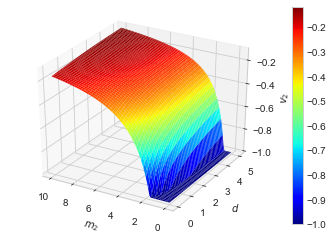

In [50]:
# a main
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')

# a.1 constrain v2 values for plot purpose
limit_v2=np.array(np.copy(v2_grid))
limit_v2[limit_v2<(-1)]=-1

cs = ax.plot_surface(m2_grid,d2_grid,limit_v2,cmap=cm.jet)

# b. add labels
ax.set_xlabel('$m_2$')
ax.set_ylabel('$d$')
ax.set_zlabel('$v_2$')

# c. invert xaxis
ax.invert_xaxis()

# d. add colorbar
fig.colorbar(cs);

The figuere shows that a high $m_{2}$ yields a high $v_{2}$, because higher cash at hand in the beggining of period two, implies better consumption possibilities and thereby higher utility. Furthermore, a higher $d$ implies a higher $v_{2}$, because a higher stack of durable consumption goods in period 1 gives a higher utility in period 2 <br>
<br>
For $c^{\ast}(m_2,d)$:

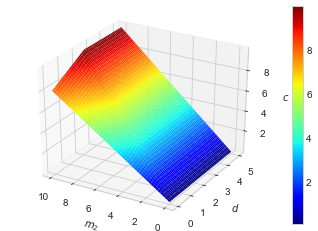

In [51]:
# a. main
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
cs = ax.plot_surface(m2_grid,d2_grid,c2_grid,cmap=cm.jet)

# b. add labels
ax.set_xlabel('$m_2$')
ax.set_ylabel('$d$')
ax.set_zlabel('$c$')

# c. invert xaxis
ax.invert_xaxis()

# d. add colorbar
fig.colorbar(cs);

The firgure shows that a high $m_{2}$ yields a high $c^{\ast}$, because more cash at hand in the beginning of period 2 implies higher comsumption in period 2. <br>
<br>
For $x^{\ast}(m_2,d)$:

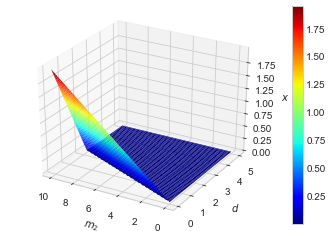

In [52]:
# a. main
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')

cs = ax.plot_surface(m2_grid,d2_grid,x2_grid,cmap=cm.jet)

# b. add labels
ax.set_xlabel('$m_2$')
ax.set_ylabel('$d$')
ax.set_zlabel('$x$')

# c. invert xaxis
ax.invert_xaxis()

# d. add colorbar
fig.colorbar(cs);

$m_2$ has a positive effect on $x^{\ast}$, which is clear from the definition of $x^{\ast}$. $d$ has an indirect negative effect through $m_2$, because it affects $a$ positively, which affects $m_2$ positively. This implies that pre-comitted durable consumtion has a negativ effected on extra durable consumtion. <br>
<br>
**Question 2:** Find and plot the functions $v_{1}(m_{1})$ and $d^{\ast}(m_1)$. Comment.<br>
<br>
**Hint:** For interpolation of $v_2(m_2,d)$ consider using `interpolate.RegularGridInterpolator([GRID-VECTOR1,GRID-VECTOR2],VALUE-MATRIX,bounds_error=False,fill_value=None)`.

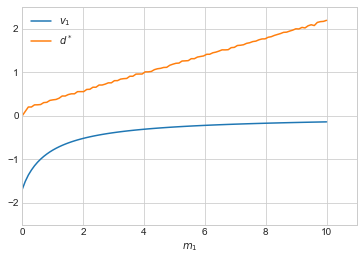

In [53]:
# a. define solve function
def solve_period_1(alpha,rho,beta,r,Delta,v1,v2_interp):

    # a. grids
    m1_vec = np.linspace(1e-8,10,100)
    v1_vec = np.empty(100)
    d2_vec = np.empty(100)
    
    # b. solve for each m1 in grid
    for i,m1 in enumerate(m1_vec):
        
        # i. objective
        obj = lambda x: -v1(x[0],m1,alpha,rho,beta,r,Delta,v2_interp)
        
        # ii. initial guess
        x0 = [m1*1/3, m1*1/3]
        
        # iii. bounds and constraitns
        bound = (1e-9,m1-1e-9)
        bounds = (bound, bound)
        ineq_con = {'type': 'ineq', 'fun': lambda x: m1-x[0]} 
        
        # iv. optimize
        result = optimize.minimize(obj,x0, method='SLSQP',
                                   bounds=bounds,
                                   constraints=[ineq_con])
        
        #result = optimize.minimize(obj,x0, method='Nelder-Mead')
        
        # v. save
        v1_vec[i] = -result.fun
        d2_vec[i] = result.x[0]
     
    return m1_vec,v1_vec,d2_vec

# b. construct interpolator
v2_interp = interpolate.RegularGridInterpolator((m2_vec,d2_vec), v2_grid,
                                                bounds_error=False,fill_value=None)
    
# c. solve period 1
m1_vec,v1_vec,d2_vec = solve_period_1(alpha,rho,beta,r,Delta,v1,v2_interp)

# d. plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(m1_vec,v1_vec,label='$v_1$')
ax.plot(m1_vec,d2_vec,label='$d^*$')
ax.legend(loc='upper left')
ax.set_xlabel('$m_1$')
ax.set_xlim([0,11])
ax.set_ylim([-2.5,2.5]);

durable consumption is increasing linearily in m1 with a coefficient of (1-alpha), which comes from the Cobb-Douglas utility function. <br>
<br>
Next, consider an **extension** of the model, where there is also a **period 0**. In this period, the household makes a choice whether to stick with the level of durables it has, $z = 0$, or adjust its stock of durables, $z = 1$. If adjusting, the household loses a part of the value of its durable stock; more specificaly it incurs a proportional loss of $\Lambda \in (0,1)$.

Mathematically, the **household problem in period 0** is:

$$
\begin{aligned}
v_{0}(m_{0},d_{0}) &= \max_{z\in\{0,1\}} \begin{cases}
w(m_{0},d_{0}) & \text{if } z = 0\\
v_1(m_0+(1-\Lambda) d_{0}) & \text{if } z = 1\\
\end{cases}\\
\end{aligned}
$$
<br>
The **parameters** and **grids** for $m_0$ and $d_0$ should be:

In [54]:
Lambda = 0.2
m0_vec = np.linspace(1e-8,6,100)
d0_vec = np.linspace(1e-8,3,100)

**Question 3:** For which values of $m_0$ and  $d_0$ is the optimal choice not to adjust, i.e. $z = 0$? Show this in a plot. Give an interpretion of your results.

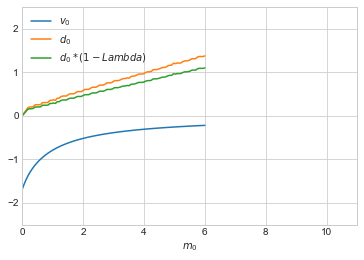

In [55]:
# a. define solve function
def solve_period_0(alpha,rho,beta,r,Delta,v1,v2_interp):

    # a. grids
    m0_vec = np.linspace(1e-8,6,100)
    d0_vec = np.linspace(1e-8,3,100)
    v0_vec = np.empty(100)
    
    # b. solve for each m1 in grid
    for i,m0 in enumerate(m0_vec):
        
        # i. objective
        obj = lambda x: -v1(x[0],m0,alpha,rho,beta,r,Delta,v2_interp)
        
        # ii. initial guess
        x0 = [m0*1/3, m0*1/3]
        
        # iii. bounds and constraitns
        bound = (1e-9,m0-1e-9)
        bounds = (bound, bound)
        ineq_con = {'type': 'ineq', 'fun': lambda x: m0-x[0]} 
        
        # iv. optimize
        result = optimize.minimize(obj,x0, method='SLSQP',
                                   bounds=bounds,
                                   constraints=[ineq_con])
        
        #result = optimize.minimize(obj,x0, method='Nelder-Mead')
        
        # v. save
        v0_vec[i] = -result.fun
        d0_vec[i] = result.x[0]
     
    return m0_vec,v0_vec,d0_vec

# b. construct interpolator
#v2_interp = interpolate.RegularGridInterpolator((m2_vec,d2_vec), v2_grid,
#                                                bounds_error=False,fill_value=None)
    
# c. solve period 1
m0_vec,v0_vec,d0_vec = solve_period_0(alpha,rho,beta,r,Delta,v1,v2_interp)

d02_vec = d0_vec * (1 - Lambda)

# d. plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(m0_vec,v0_vec,label='$v_0$')
ax.plot(m0_vec,d0_vec,label='$d_0$')
ax.plot(m0_vec,d02_vec,label='$d_0 * ( 1 - Lambda ) $')
ax.legend(loc='upper left')
ax.set_xlabel('$m_0$')
ax.set_xlim([0,11])
ax.set_ylim([-2.5,2.5]);


I can be seen from the figure that all values of d > 0 and m > -2 z equals to zero. If this is the case, they will adjust their there durables. 

<h1> Problem 3 - Gradient descent

First we insert given information and code block from the exam description:

Let $\boldsymbol{x} = \left[\begin{array}{c}
x_1 \\
x_2\\
\end{array}\right]$ be a two-dimensional vector. Consider the following algorithm:

**Algorithm:** `gradient_descent()`

**Goal:** Minimize the function $f(\boldsymbol{x})$.

1. Choose a tolerance $\epsilon>0$, a scale factor $ \Theta > 0$, and a small number $\Delta > 0$
2. Guess on $\boldsymbol{x}_0$ and set $n=1$
3. Compute a numerical approximation of the jacobian for $f$ by

    $$
    \nabla f(\boldsymbol{x}_{n-1}) \approx \frac{1}{\Delta}\left[\begin{array}{c}
    f\left(\boldsymbol{x}_{n-1}+\left[\begin{array}{c}
    \Delta\\
    0
    \end{array}\right]\right)-f(\boldsymbol{x}_{n-1})\\
    f\left(\boldsymbol{x}_{n-1}+\left[\begin{array}{c}
    0\\
    \Delta
    \end{array}\right]\right)-f(\boldsymbol{x}_{n-1})
    \end{array}\right]
    $$

4. Stop if the maximum element in $|\nabla f(\boldsymbol{x}_{n-1})|$ is less than $\epsilon$
5. Set $\theta = \Theta$ 
6. Compute $f^{\theta}_{n} = f(\boldsymbol{x}_{n-1} - \theta \nabla f(\boldsymbol{x}_{n-1}))$
7. If $f^{\theta}_{n} < f(\boldsymbol{x}_{n-1})$ continue to step 9
8. Set $\theta = \frac{\theta}{2}$ and return to step 6     
9. Set $x_{n} = x_{n-1} - \theta \nabla f(\boldsymbol{x}_{n-1})$
10. Set $n = n + 1$ and return to step 3

Optimizer function: 

In [56]:

def gradient_descent(f,x0,epsilon=1e-6,Theta=0.1,Delta=1e-8,max_iter=10_000):

    # step 2:
    x = x0
    fx = f(x0)
    n = 1
    
    # start iteration
    while n < max_iter:

        # step 3: computing a numerical approximation of the jacobian for f
        x1_variable=[x[0]+Delta,x[1]]
        x2_variable=[x[0],x[1]+Delta]

        # step 2: function and derivatives
        def rosen_jac(x):
            jac = np.zeros(2)
            jac[0] = f(x1_variable)-f(x)
            jac[1] = f(x2_variable)-f(x)
            return jac*(1/Delta)
            
        # step 4: check convergence
        if np.max(np.array(abs(rosen_jac(x)))) < epsilon:
            break

        # define the previous period of f and x
        x_prev = x
        fx_prev = fx
        
        # re-define the jacobian
        jacx = rosen_jac(x)
       
        # step 5-9
        fx_ast = np.inf
        theta_ast = Theta
        theta = Theta / 2
        if fx < fx_ast:
            fx_ast = fx
            theta_ast = theta
        x = x_prev - theta * jacx                    
        if fx > fx_prev:
            break
            
        # step 10
        n += 1
        
    return x,n

**Test case:**

In [57]:
def rosen(x):
    return (1.0-x[0])**2+2*(x[1]-x[0]**2)**2

x0 = np.array([1.1,1.1])
try:
    x,it = gradient_descent(rosen,x0)
    print(f'minimum found at ({x[0]:.4f},{x[1]:.4f}) after {it} iterations')
    assert np.allclose(x,[1,1])
except:
    print('not implemented yet')

minimum found at (1.0000,1.0000) after 578 iterations
